In [53]:
import folium
import requests
import pandas
import numpy as np
from matplotlib import pyplot as plt 
from sklearn.cluster import KMeans
import datetime
from datetime import date
import calendar
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')

# Intro

explanation of project
data lifecycle


#### Reasources need for project
1. numpy- 
2. pandas-
3. matplotlib-
4. seaborn- 
5. datetime-
6. Voilin Plot-
7. Follium- 
8. KMEANS- 


In [54]:
# Map of DC
map_osm = folium.Map(location=[38.9072, -77.0369], zoom_start=11)
map_osm

# Data Collection 

In [55]:
crime_data = pandas.read_csv("Crime_Incidents_in_2019.csv")
crime_data.head(5)

,X,Y,CCN,REPORT_DAT,SHIFT,METHOD,OFFENSE,BLOCK,XBLOCK,YBLOCK,...,BLOCK_GROUP,CENSUS_TRACT,VOTING_PRECINCT,LATITUDE,LONGITUDE,BID,START_DATE,END_DATE,OBJECTID,OCTO_RECORD_ID
0,-77.029707,38.939217,19081581,2019/05/12 17:07:34+00,DAY,OTHERS,THEFT F/AUTO,3900 - 3999 BLOCK OF 13TH STREET NW,397424.68,141258.25,...,002502 1,2502.0,Precinct 47,38.939209,-77.029705,NaN,2019/05/12 03:00:54+00,2019/05/12 13:30:03+00,83121287,NaN
1,-77.034603,38.932575,19081589,2019/05/12 16:31:46+00,DAY,OTHERS,THEFT/OTHER,1400 - 1599 BLOCK OF NEWTON STREET NW,396999.96,140521.12,...,002801 1,2801.0,Precinct 41,38.932567,-77.034601,NaN,2019/05/12 15:30:54+00,2019/05/12 16:00:54+00,83121288,NaN
2,-77.085291,38.959920,19081603,2019/05/12 17:18:34+00,DAY,OTHERS,THEFT/OTHER,5300 - 5399 BLOCK OF WISCONSIN AVENUE NW,392607.98,143559.50,...,001100 2,1100.0,Precinct 32,38.959912,-77.085288,NaN,2019/05/12 16:12:47+00,NaN,83121289,NaN
3,-77.026511,38.897356,19081606,2019/05/12 17:39:46+00,DAY,OTHERS,THEFT/OTHER,1000 - 1099 BLOCK OF F STREET NW,397700.46,136611.23,...,005800 1,5800.0,Precinct 129,38.897348,-77.026509,DOWNTOWN,2019/05/12 17:07:36+00,NaN,83121290,NaN
4,-77.028233,38.957823,19081612,2019/05/12 18:26:51+00,DAY,OTHERS,BURGLARY,5600 - 5699 BLOCK OF GEORGIA AVENUE NW,397553.15,143323.63,...,002002 2,2002.0,Precinct 54,38.957815,-77.028231,NaN,2019/05/12 17:06:59+00,2019/05/12 18:00:07+00,83121291,NaN


# Data Processing


In [56]:
cords = np.array(crime_data[['LATITUDE','LONGITUDE']])
crime_data['CORDS'] = cords.tolist()

crime_data['time'] = pandas.to_datetime(crime_data['START_DATE'],format= '%H:%M',exact=False).dt.hour

crime_data

,X,Y,CCN,REPORT_DAT,SHIFT,METHOD,OFFENSE,BLOCK,XBLOCK,YBLOCK,...,VOTING_PRECINCT,LATITUDE,LONGITUDE,BID,START_DATE,END_DATE,OBJECTID,OCTO_RECORD_ID,CORDS,time
0,-77.029707,38.939217,19081581,2019/05/12 17:07:34+00,DAY,OTHERS,THEFT F/AUTO,3900 - 3999 BLOCK OF 13TH STREET NW,397424.68,141258.25,...,Precinct 47,38.939209,-77.029705,NaN,2019/05/12 03:00:54+00,2019/05/12 13:30:03+00,83121287,NaN,"[38.9392090053, -77.0297051135]",3
1,-77.034603,38.932575,19081589,2019/05/12 16:31:46+00,DAY,OTHERS,THEFT/OTHER,1400 - 1599 BLOCK OF NEWTON STREET NW,396999.96,140521.12,...,Precinct 41,38.932567,-77.034601,NaN,2019/05/12 15:30:54+00,2019/05/12 16:00:54+00,83121288,NaN,"[38.9325673709, -77.0346008373]",15
2,-77.085291,38.959920,19081603,2019/05/12 17:18:34+00,DAY,OTHERS,THEFT/OTHER,5300 - 5399 BLOCK OF WISCONSIN AVENUE NW,392607.98,143559.50,...,Precinct 32,38.959912,-77.085288,NaN,2019/05/12 16:12:47+00,NaN,83121289,NaN,"[38.9599119666, -77.085288276]",16
3,-77.026511,38.897356,19081606,2019/05/12 17:39:46+00,DAY,OTHERS,THEFT/OTHER,1000 - 1099 BLOCK OF F STREET NW,397700.46,136611.23,...,Precinct 129,38.897348,-77.026509,DOWNTOWN,2019/05/12 17:07:36+00,NaN,83121290,NaN,"[38.8973478904, -77.0265085554]",17
4,-77.028233,38.957823,19081612,2019/05/12 18:26:51+00,DAY,OTHERS,BURGLARY,5600 - 5699 BLOCK OF GEORGIA AVENUE NW,397553.15,143323.63,...,Precinct 54,38.957815,-77.028231,NaN,2019/05/12 17:06:59+00,2019/05/12 18:00:07+00,83121291,NaN,"[38.9578148866, -77.0282306394]",17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33911,-77.032731,38.940282,19128998,2019/07/23 19:12:45+00,EVENING,OTHERS,THEFT F/AUTO,4000 - 4099 BLOCK OF 14TH STREET NW,397162.59,141376.55,...,Precinct 47,38.940274,-77.032729,NaN,2019/07/20 18:00:29+00,2019/07/23 18:47:29+00,83589921,NaN,"[38.9402738789, -77.0327286883]",18
33912,-76.994979,38.880284,19129010,2019/07/23 19:13:43+00,EVENING,OTHERS,THEFT/OTHER,700 - 799 BLOCK OF 8TH STREET SE,400435.87,134715.77,...,Precinct 90,38.880276,-76.994977,CAPITOL HILL,2019/07/22 05:54:56+00,2019/07/22 05:55:18+00,83589922,NaN,"[38.880275773, -76.9949765956]",5
33913,-77.100824,38.925823,19129015,2019/07/23 19:27:35+00,EVENING,OTHERS,THEFT F/AUTO,5100 - 5119 BLOCK OF FULTON STREET NW,391257.52,139775.84,...,Precinct 8,38.925815,-77.100822,NaN,2019/07/23 16:30:33+00,2019/07/23 17:25:54+00,83589923,NaN,"[38.9258152896, -77.1008215022]",16
33914,-77.078748,38.948799,19129020,2019/07/23 19:59:24+00,EVENING,OTHERS,THEFT/OTHER,4500 - 4599 BLOCK OF 40TH STREET NW,393173.95,142324.53,...,Precinct 32,38.948792,-77.078746,NaN,2019/07/23 18:05:57+00,2019/07/23 19:10:12+00,83589924,NaN,"[38.9487916125, -77.0787458915]",18


# Bar Graph of Crimes Commited

In [57]:
def list_y(df, lst):
    for (index, row) in df.iterrows():
        curr_time = row['time']
        if ((curr_time >= 0) & (curr_time < 6)):
            lst[0] += 1
        elif ((curr_time >= 6) & (curr_time < 12)):
            lst[1] += 1
        elif ((curr_time >= 12) & (curr_time < 18)):
            lst[2] += 1
        elif ((curr_time >= 18) & (curr_time < 24)):
            lst[3] += 1
        else:
            print("Thats not even an hour @ index: " + index)
        
    return lst

In [58]:
crime_type_table = crime_data['OFFENSE'].value_counts()
crime_type_table

THEFT/OTHER                   15571
THEFT F/AUTO                  10719
ROBBERY                        2232
MOTOR VEHICLE THEFT            2186
ASSAULT W/DANGEROUS WEAPON     1567
BURGLARY                       1272
SEX ABUSE                       197
HOMICIDE                        164
ARSON                             8
Name: OFFENSE, dtype: int64

Only want to look at the top 5 crimes  

In [59]:
top_crime_table = crime_type_table[:5]
top_crime_data = crime_data[crime_data['OFFENSE'].isin(top_crime_table.index)]
top_crime_table

THEFT/OTHER                   15571
THEFT F/AUTO                  10719
ROBBERY                        2232
MOTOR VEHICLE THEFT            2186
ASSAULT W/DANGEROUS WEAPON     1567
Name: OFFENSE, dtype: int64

[Text(0.5, 1.0, 'Total THEFT/OTHER Crime per Hour')]

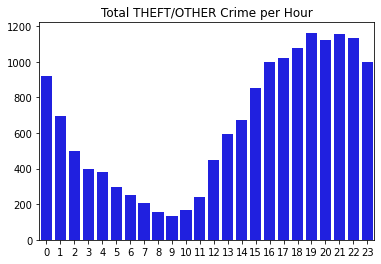

In [60]:
hour, crime_count = np.unique(crime_data[crime_data['OFFENSE'] == 'THEFT/OTHER'].time,return_counts=True)
sns.barplot(hour,crime_count,color = 'blue').set(title="Total THEFT/OTHER Crime per Hour")

[Text(0.5, 1.0, 'Total THEFT F/AUTO Crime per Hour')]

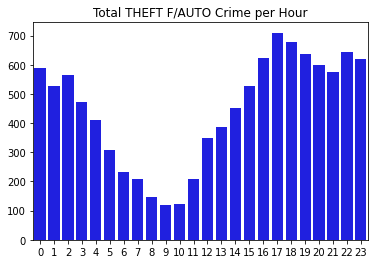

In [61]:
hour, crime_count = np.unique(crime_data[crime_data['OFFENSE'] == 'THEFT F/AUTO'].time,return_counts=True)
sns.barplot(hour,crime_count,color = 'blue').set(title="Total THEFT F/AUTO Crime per Hour")

[Text(0.5, 1.0, 'Total ROBBERY Crime per Hour')]

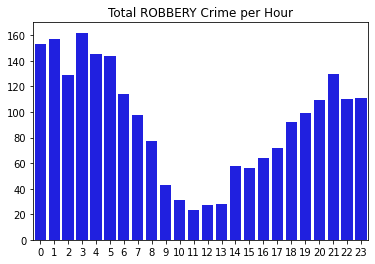

In [62]:
hour, crime_count = np.unique(crime_data[crime_data['OFFENSE'] == 'ROBBERY'].time,return_counts=True)
sns.barplot(hour,crime_count,color = 'blue').set(title="Total ROBBERY Crime per Hour")

[Text(0.5, 1.0, 'Total MOTOR VEHICLE THEFT Crime per Hour')]

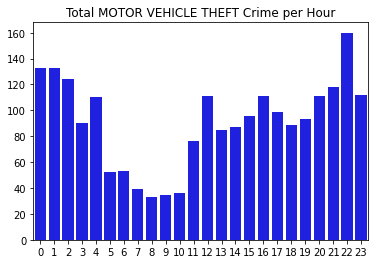

In [63]:
hour, crime_count = np.unique(crime_data[crime_data['OFFENSE'] == 'MOTOR VEHICLE THEFT'].time,return_counts=True)
sns.barplot(hour,crime_count,color = 'blue').set(title="Total MOTOR VEHICLE THEFT Crime per Hour")

[Text(0.5, 1.0, 'Total ASSAULT W/DANGEROUS WEAPON Crime per Hour')]

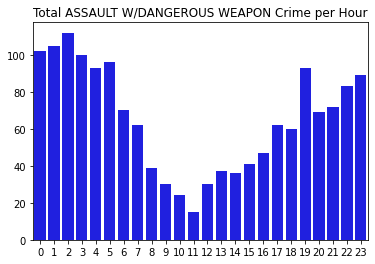

In [64]:
hour, crime_count = np.unique(crime_data[crime_data['OFFENSE'] == 'ASSAULT W/DANGEROUS WEAPON'].time,return_counts=True)
sns.barplot(hour,crime_count,color = 'blue').set(title="Total ASSAULT W/DANGEROUS WEAPON Crime per Hour")

How to see all top5 crimes on one graph 

<AxesSubplot:xlabel='time', ylabel='count'>

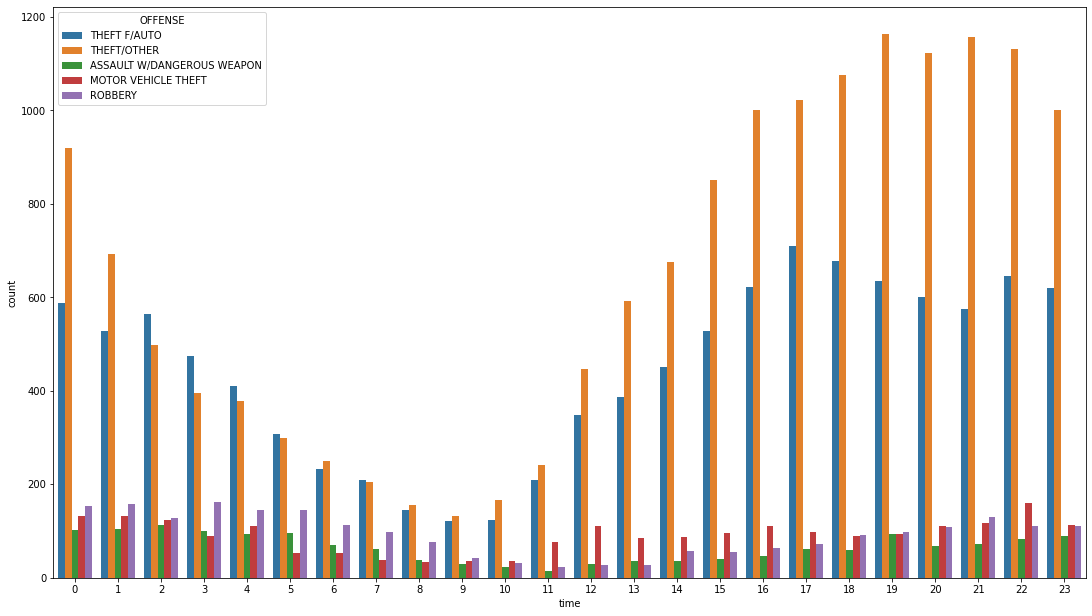

In [65]:
fig = plt.figure(figsize=(10,80))
fig.set_size_inches(18.5, 10.5)
sns.countplot(x="time", hue="OFFENSE", data=top_crime_data)

Better approach

<AxesSubplot:xlabel='time', ylabel='OFFENSE'>

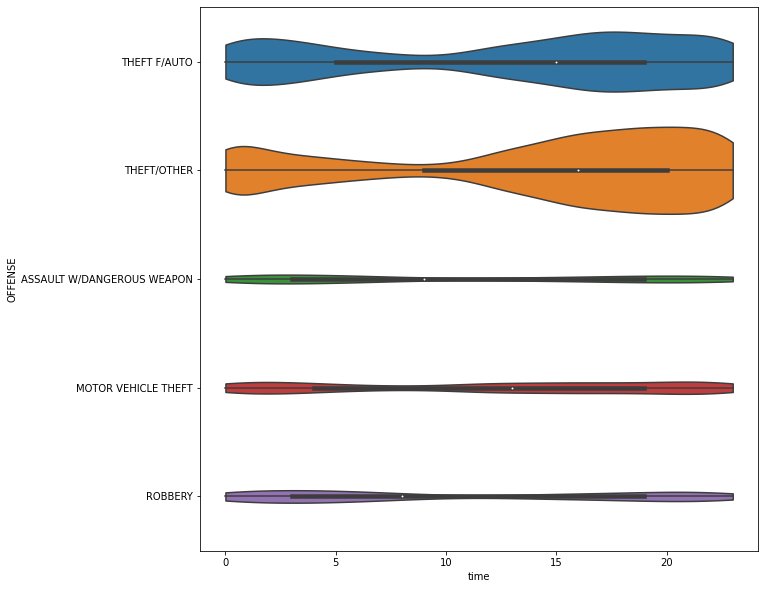

In [66]:
fig = plt.figure(figsize=(10,10))

sns.violinplot(data=top_crime_data, x = 'time',y='OFFENSE',cut=0,scale='count')

[Text(0.5, 1.0, 'Total ASSAULT W/DANGEROUS WEAPON Crime per Month')]

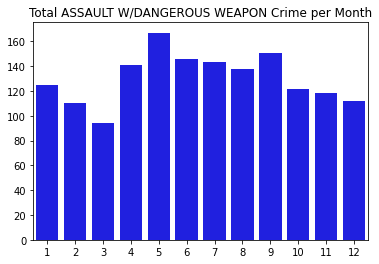

In [67]:
# Created the month column wiht the just int of the month
crime_data['month'] = pandas.to_datetime(crime_data['START_DATE'],exact=False).dt.month


month, crime_count = np.unique(crime_data[(crime_data['OFFENSE'] == 'ASSAULT W/DANGEROUS WEAPON')].month,return_counts=True)
sns.barplot(month,crime_count,color = 'blue').set(title="Total ASSAULT W/DANGEROUS WEAPON Crime per Month")

In [68]:
crime_data['day'] = pandas.to_datetime(crime_data['START_DATE'],exact=False).dt.day

# Determines the season (szn) of the crime (these dates are from 2019)
def find_szn(row):
    #First 4 if statements to decide on months where season changes
    if (row['month'] == 3):
        if (row['day'] < 20):
            return "Winter"
        else:
            return "Spring"
        
    elif (row['month'] == 6):
        if (row['day'] < 21):
            return "Spring"
        else:
            return "Summer"
        
    elif (row['month'] == 9):
        if (row['day'] < 23):
            return "Summer"
        else:
            return "Fall"
        
    elif (row['month'] == 12):
        if (row['day'] < 22):
            return "Fall"
        else:
            return "Winter"
        
    elif (row['month'] < 3):
        return "Winter"
    elif (row['month'] < 6):
        return "Spring"
    elif (row['month'] < 9):
        return "Summer"
    elif (row['month'] < 12):
        return "Fall"
    
    else:
        return "Fake Month!"

[Text(0.5, 1.0, 'Total ASSAULT W/DANGEROUS WEAPON Crime per Season')]

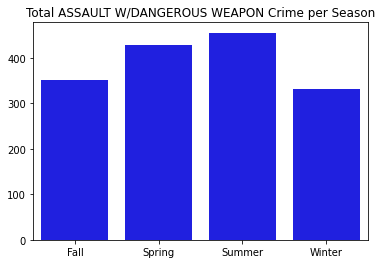

In [69]:
# Create a season column for the dataframe
crime_data['season'] = crime_data.apply(lambda row: find_szn(row), axis=1)

szn, crime_count = np.unique(crime_data[(crime_data['OFFENSE'] == 'ASSAULT W/DANGEROUS WEAPON')].season,return_counts=True)
sns.barplot(szn,crime_count,color = 'blue').set(title="Total ASSAULT W/DANGEROUS WEAPON Crime per Season")

In [77]:
crime_data['weekday'] = crime_data.apply(lambda row: pandas.Timestamp(row['START_DATE']).day_name(), axis=1)
crime_data

,X,Y,CCN,REPORT_DAT,SHIFT,METHOD,OFFENSE,BLOCK,XBLOCK,YBLOCK,...,START_DATE,END_DATE,OBJECTID,OCTO_RECORD_ID,CORDS,time,month,day,season,weekday
0,-77.029707,38.939217,19081581,2019/05/12 17:07:34+00,DAY,OTHERS,THEFT F/AUTO,3900 - 3999 BLOCK OF 13TH STREET NW,397424.68,141258.25,...,2019/05/12 03:00:54+00,2019/05/12 13:30:03+00,83121287,NaN,"[38.9392090053, -77.0297051135]",3,5,12,Spring,Sunday
1,-77.034603,38.932575,19081589,2019/05/12 16:31:46+00,DAY,OTHERS,THEFT/OTHER,1400 - 1599 BLOCK OF NEWTON STREET NW,396999.96,140521.12,...,2019/05/12 15:30:54+00,2019/05/12 16:00:54+00,83121288,NaN,"[38.9325673709, -77.0346008373]",15,5,12,Spring,Sunday
2,-77.085291,38.959920,19081603,2019/05/12 17:18:34+00,DAY,OTHERS,THEFT/OTHER,5300 - 5399 BLOCK OF WISCONSIN AVENUE NW,392607.98,143559.50,...,2019/05/12 16:12:47+00,NaN,83121289,NaN,"[38.9599119666, -77.085288276]",16,5,12,Spring,Sunday
3,-77.026511,38.897356,19081606,2019/05/12 17:39:46+00,DAY,OTHERS,THEFT/OTHER,1000 - 1099 BLOCK OF F STREET NW,397700.46,136611.23,...,2019/05/12 17:07:36+00,NaN,83121290,NaN,"[38.8973478904, -77.0265085554]",17,5,12,Spring,Sunday
4,-77.028233,38.957823,19081612,2019/05/12 18:26:51+00,DAY,OTHERS,BURGLARY,5600 - 5699 BLOCK OF GEORGIA AVENUE NW,397553.15,143323.63,...,2019/05/12 17:06:59+00,2019/05/12 18:00:07+00,83121291,NaN,"[38.9578148866, -77.0282306394]",17,5,12,Spring,Sunday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33911,-77.032731,38.940282,19128998,2019/07/23 19:12:45+00,EVENING,OTHERS,THEFT F/AUTO,4000 - 4099 BLOCK OF 14TH STREET NW,397162.59,141376.55,...,2019/07/20 18:00:29+00,2019/07/23 18:47:29+00,83589921,NaN,"[38.9402738789, -77.0327286883]",18,7,20,Summer,Saturday
33912,-76.994979,38.880284,19129010,2019/07/23 19:13:43+00,EVENING,OTHERS,THEFT/OTHER,700 - 799 BLOCK OF 8TH STREET SE,400435.87,134715.77,...,2019/07/22 05:54:56+00,2019/07/22 05:55:18+00,83589922,NaN,"[38.880275773, -76.9949765956]",5,7,22,Summer,Monday
33913,-77.100824,38.925823,19129015,2019/07/23 19:27:35+00,EVENING,OTHERS,THEFT F/AUTO,5100 - 5119 BLOCK OF FULTON STREET NW,391257.52,139775.84,...,2019/07/23 16:30:33+00,2019/07/23 17:25:54+00,83589923,NaN,"[38.9258152896, -77.1008215022]",16,7,23,Summer,Tuesday
33914,-77.078748,38.948799,19129020,2019/07/23 19:59:24+00,EVENING,OTHERS,THEFT/OTHER,4500 - 4599 BLOCK OF 40TH STREET NW,393173.95,142324.53,...,2019/07/23 18:05:57+00,2019/07/23 19:10:12+00,83589924,NaN,"[38.9487916125, -77.0787458915]",18,7,23,Summer,Tuesday


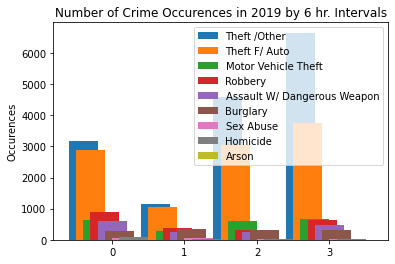

In [72]:


# Crime offenses documented in DC
x_theft_o = crime_data[(crime_data['OFFENSE'] == 'THEFT/OTHER')]
x_theft_a = crime_data[(crime_data['OFFENSE'] == 'THEFT F/AUTO')]
x_theft_m = crime_data[(crime_data['OFFENSE'] == 'MOTOR VEHICLE THEFT')]
x_robbery = crime_data[(crime_data['OFFENSE'] == 'ROBBERY')]
x_assault = crime_data[crime_data['OFFENSE'] == 'ASSAULT W/DANGEROUS WEAPON']
x_burglary = crime_data[crime_data['OFFENSE'] == 'BURGLARY']
x_sexabuse = crime_data[crime_data['OFFENSE'] == 'SEX ABUSE']
x_homicide = crime_data[crime_data['OFFENSE'] == 'HOMICIDE']
x_arson = crime_data[crime_data['OFFENSE'] == 'ARSON']

# crimes = ['THEFT/OTHER', 'THEFT F/AUTO', 'MOTOR VEHICLE THEFT', 'ROBBERY',
#          'ASSAULT W/DANGEROUS WEAPON', 'BURGLARY', 'SEX ABUSE', 'HOMICIDE', 'ARSON']

times = ['0 - 6', '6 - 12', '12 - 6', '6- 12']

# y_theft_o = [0, 0, 0, 0]
# y_theft_a = [0, 0, 0, 0]
# y_theft_m = [0, 0, 0, 0]
# y_robbery = [0, 0, 0, 0]
# y_assault = [0, 0, 0, 0]
# y_burglary = [0, 0, 0, 0]
# y_sexabuse = [0, 0, 0, 0]
# y_homicide = [0, 0, 0, 0]
# y_arson = [0, 0, 0, 0]


#Finalize the y-axis for all the 
y_theft_o = list_y(x_theft_o, [0, 0, 0, 0])
y_theft_a = list_y(x_theft_a, [0, 0, 0, 0])
y_theft_m = list_y(x_theft_m, [0, 0, 0, 0])
y_robbery = list_y(x_robbery, [0, 0, 0, 0])
y_assault = list_y(x_assault, [0, 0, 0, 0])
y_burglary = list_y(x_burglary, [0, 0, 0, 0])
y_sexabuse = list_y(x_sexabuse, [0, 0, 0, 0])
y_homicide = list_y(x_homicide, [0, 0, 0, 0])
y_arson = list_y(x_arson, [0, 0, 0, 0])

x_pos = np.arange(len(times))

# plt.xticks(x_pos, times)
plt.ylabel('Occurences')
plt.title('Number of Crime Occurences in 2019 by 6 hr. Intervals')

plt.bar(x_pos-0.4, y_theft_o, width=0.4, label='Theft /Other')
plt.bar(x_pos-0.3, y_theft_a, width=0.4, label='Theft F/ Auto')
plt.bar(x_pos-0.2, y_theft_m, width=0.4, label='Motor Vehicle Theft')
plt.bar(x_pos-0.1, y_robbery, width=0.4, label='Robbery')
plt.bar(x_pos-0.0, y_assault, width=0.4, label='Assault W/ Dangerous Weapon')
plt.bar(x_pos+0.1, y_burglary, width=0.4, label='Burglary')
plt.bar(x_pos+0.2, y_sexabuse, width=0.4, label='Sex Abuse')
plt.bar(x_pos+0.3, y_homicide, width=0.4, label='Homicide')
plt.bar(x_pos+0.4, y_arson, width=0.4, label='Arson')
plt.legend()


##### To get an idea of what the crime spread looks like
Too many data points to graph plot on a map. Below is a not the best approach to visualize all of the crime in DC 

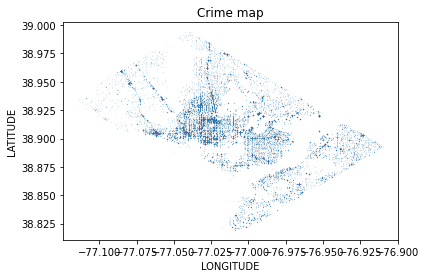

In [73]:
cords = crime_data['CORDS']
lat = [cord[0] for cord in cords]
long = [cord[1] for cord in cords]
plt.scatter(long,lat,s=.001)
plt.title("Crime map")
plt.xlabel("LONGITUDE")
plt.ylabel("LATITUDE")
plt.show()

##### Better Approach using KMEANS
Explanation of KMEANS

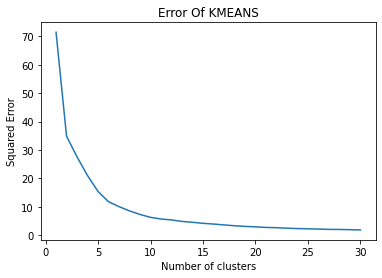

In [74]:
x_limit = 30  #the x scale for the graph and the number of times KMEANS is run

inertia = [] #kmeans error
cords = np.array(crime_data[['LATITUDE','LONGITUDE']])
for i in range(1,x_limit+1):
    kmeans = KMeans(i) # ith KMEANS 
    kmeans.fit(cords)      # fit it to the data
    inertia.append(kmeans.inertia_)  # appened the error to the inertia array

number_clusters = [i for i in range(1,x_limit+1)]
plt.plot(number_clusters,inertia)  # Ploting the Error Of KMEANS
plt.title('Error Of KMEANS')
plt.xlabel('Number of clusters')
plt.ylabel('Squared Error');

In [75]:
number_of_clusters = 20
kmeans = KMeans(number_of_clusters) # ith KMEANS 
kmeans.fit(cords)
total_crime = crime_data.shape[0] # Gets number of rows
crime_density = [] # getting the number of crimes per cluster
for i in range(number_of_clusters):
    crime_density.append(list(kmeans.labels_).count(i)/total_crime)

In [76]:
map_osm = folium.Map(location=[38.9072, -77.0369], zoom_start=11)
for i in range(number_of_clusters):
    folium.Circle(
        radius =crime_density[i]*10000,
        location=[kmeans.cluster_centers_[i][0],kmeans.cluster_centers_[i][1]],
        color="red",
    fill=True,
    ).add_to(map_osm)# add circle to the map   
map_osm